In [23]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt


In [5]:
data = xr.open_dataset('Relative_humidity_1981_2020.nc')
data

<xarray.Dataset>
Dimensions:    (longitude: 137, latitude: 65, time: 8640)
Coordinates:
  * longitude  (longitude) float32 -17.0 -16.75 -16.5 -16.25 ... 16.5 16.75 17.0
  * latitude   (latitude) float32 20.0 19.75 19.5 19.25 ... 4.75 4.5 4.25 4.0
  * time       (time) datetime64[ns] 1991-01-01 ... 2020-12-01T23:00:00
Data variables:
    r          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-07-14 08:59:12 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [6]:
rh = data.r
rh

<xarray.DataArray 'r' (time: 8640, latitude: 65, longitude: 137)>
[76939200 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -17.0 -16.75 -16.5 -16.25 ... 16.5 16.75 17.0
  * latitude   (latitude) float32 20.0 19.75 19.5 19.25 ... 4.75 4.5 4.25 4.0
  * time       (time) datetime64[ns] 1991-01-01 ... 2020-12-01T23:00:00
Attributes:
    units:          %
    long_name:      Relative humidity
    standard_name:  relative_humidity

In [7]:

togo=rh.sel(longitude=slice(-1.5,3.5),latitude=slice(11.5,4))

In [8]:
togo

<xarray.DataArray 'r' (time: 8640, latitude: 31, longitude: 21)>
[5624640 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -1.5 -1.25 -1.0 -0.75 ... 2.75 3.0 3.25 3.5
  * latitude   (latitude) float32 11.5 11.25 11.0 10.75 ... 4.75 4.5 4.25 4.0
  * time       (time) datetime64[ns] 1991-01-01 ... 2020-12-01T23:00:00
Attributes:
    units:          %
    long_name:      Relative humidity
    standard_name:  relative_humidity

In [9]:
yr=rh.sel(time=slice('1995','2000'))
yr

<xarray.DataArray 'r' (time: 1728, latitude: 65, longitude: 137)>
[15387840 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -17.0 -16.75 -16.5 -16.25 ... 16.5 16.75 17.0
  * latitude   (latitude) float32 20.0 19.75 19.5 19.25 ... 4.75 4.5 4.25 4.0
  * time       (time) datetime64[ns] 1995-01-01 ... 2000-12-01T23:00:00
Attributes:
    units:          %
    long_name:      Relative humidity
    standard_name:  relative_humidity

In [10]:
togo

<xarray.DataArray 'r' (time: 8640, latitude: 31, longitude: 21)>
[5624640 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -1.5 -1.25 -1.0 -0.75 ... 2.75 3.0 3.25 3.5
  * latitude   (latitude) float32 11.5 11.25 11.0 10.75 ... 4.75 4.5 4.25 4.0
  * time       (time) datetime64[ns] 1991-01-01 ... 2020-12-01T23:00:00
Attributes:
    units:          %
    long_name:      Relative humidity
    standard_name:  relative_humidity

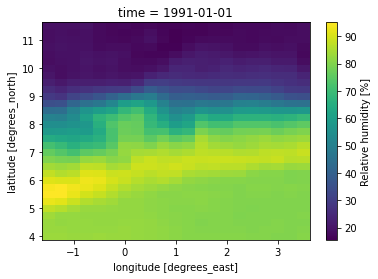

In [11]:
togo[0,:,:].plot()


In [12]:
rh_mean=rh.groupby('time.season').mean()
rh_mean

<xarray.DataArray 'r' (season: 4, latitude: 65, longitude: 137)>
array([[[45.116493, 41.06006 , 36.641506, ..., 21.366724, 21.177757,
         19.657595],
        [44.923927, 40.614235, 35.434273, ..., 22.466028, 22.345282,
         21.077192],
        [44.54281 , 40.185955, 34.86744 , ..., 22.707224, 22.716225,
         22.177105],
        ...,
        [82.54628 , 82.53091 , 82.51879 , ..., 50.317715, 49.673256,
         48.703476],
        [82.95839 , 82.9856  , 82.98993 , ..., 57.22018 , 56.245113,
         54.96652 ],
        [83.34711 , 83.35022 , 83.35646 , ..., 61.73595 , 60.960625,
         60.305935]],

       [[75.0701  , 70.90759 , 66.09675 , ..., 20.901052, 20.544271,
         20.016865],
        [75.64563 , 73.274864, 66.92588 , ..., 21.44985 , 21.035143,
         20.670748],
        [75.86831 , 74.953636, 68.60222 , ..., 21.78242 , 21.518055,
         21.33142 ],
...
        [82.60931 , 82.64105 , 82.63944 , ..., 78.30782 , 76.46418 ,
         75.4377  ],
        [82.78521 , 82.83635 , 82.84173 , ..., 81.82591 , 80.528656,
         79.087265],
        [82.9502  , 82.97954 , 82.954575, ..., 83.31453 , 82.56908 ,
         82.03073 ]],

       [[59.617046, 55.487823, 50.78774 , ..., 19.882833, 19.747833,
         18.899359],
        [60.447975, 57.171455, 51.3883  , ..., 20.490486, 20.316154,
         19.569239],
        [61.054436, 58.4745  , 52.504925, ..., 20.502045, 20.514935,
         20.214554],
        ...,
        [84.24323 , 84.28583 , 84.324615, ..., 83.6096  , 82.668175,
         81.9578  ],
        [84.010056, 84.03983 , 84.089554, ..., 87.17738 , 86.334816,
         85.318405],
        [83.71133 , 83.78811 , 83.73638 , ..., 88.583466, 88.11919 ,
         87.72538 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -17.0 -16.75 -16.5 -16.25 ... 16.5 16.75 17.0
  * latitude   (latitude) float32 20.0 19.75 19.5 19.25 ... 4.75 4.5 4.25 4.0
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'

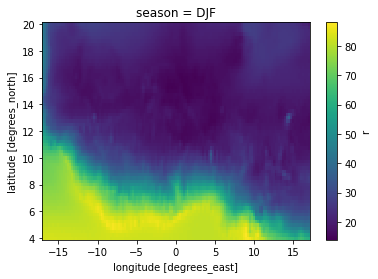

In [13]:
rh_mean[0,:,:].plot()

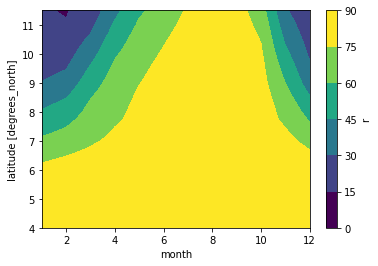

In [24]:
# hovmoller plot
togo.groupby('time.month').mean(dim=('time','longitude')).T.plot.contourf()
plt.savefig('HOVMOLLER.jpeg')